# Day 7 of Data Science Training by `Mr. Harshit Dawar`!

## KNN(K-Nearest-Neighbors)
* It is a classification algorithm of machine learning.
* It takes a constant number "K" and calculate distance from all the points, and then look for max. category count in the calculated distance & then classify accordingly.

In [4]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

In [14]:
# Importing Dataset
xdata = pd.read_csv("dataset/xdata.csv")
ydata = pd.read_csv("dataset/ydata.csv")

In [7]:
xdata.head()

,0,3.4821055700010444,2.4203917879404533
0,1,3.516279,3.719750
1,2,4.606496,3.414379
2,3,4.677011,3.047244
3,4,4.157725,3.138677
4,5,3.154431,3.619858


In [10]:
ydata

,0,0.0
0,1,0.0
1,2,0.0
2,3,0.0
3,4,0.0
4,5,0.0
...,...,...
394,395,1.0
395,396,1.0
396,397,1.0
397,398,1.0


### Selecting Desired Data

In [15]:
xdata = xdata.values
ydata = ydata.values[:, 1]

In [39]:
type(xdata)

numpy.ndarray

In [19]:
xdata

array([[ 1.00000000e+00,  3.51627900e+00,  3.71975047e+00],
       [ 2.00000000e+00,  4.60649561e+00,  3.41437943e+00],
       [ 3.00000000e+00,  4.67701056e+00,  3.04724443e+00],
       ...,
       [ 3.97000000e+02,  7.89625683e-01,  9.31669806e-01],
       [ 3.98000000e+02, -1.00253042e+00, -6.76162472e-01],
       [ 3.99000000e+02,  2.92386778e-01,  5.61177823e-01]])

In [17]:
ydata

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [22]:
xdata.shape

(399, 3)

In [27]:
a = int(0.8 * xdata.shape[0])

In [28]:
a

319

In [31]:
x_train = xdata[ : a ]
x_test = xdata[a : ]

In [34]:
# x_test

### Splitting Training and Testing Data

In [68]:
x_train, x_test, y_train, y_test = train_test_split(xdata, ydata, test_size = 0.1)

In [69]:
y_train

array([1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 1.,
       0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0., 0.,
       0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0.,
       1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1.,
       0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0.,
       0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1.,
       1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1.,
       1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0.,
       1., 1., 0., 0., 1.

In [38]:
x_train.shape, x_test.shape

((359, 3), (40, 3))

## Implementing KNN

In [70]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 3)

In [71]:
# Fitting data into KNN

classifier.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [72]:
# Checking Model HyperParameters
classifier.get_params

<bound method BaseEstimator.get_params of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')>

In [73]:
# Test the model

classifier.score(  x_test, y_test)

1.0

In [74]:
y_predictions = classifier.predict(x_test)

In [75]:
y_predictions

array([1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1.,
       0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0.,
       1., 1., 0., 0., 1., 1.])

In [76]:
from sklearn.metrics import accuracy_score

In [77]:
accuracy_score(y_test, y_predictions)

1.0

In [78]:
cm = confusion_matrix(y_test, y_predictions)

In [79]:
cm

array([[16,  0],
       [ 0, 24]])

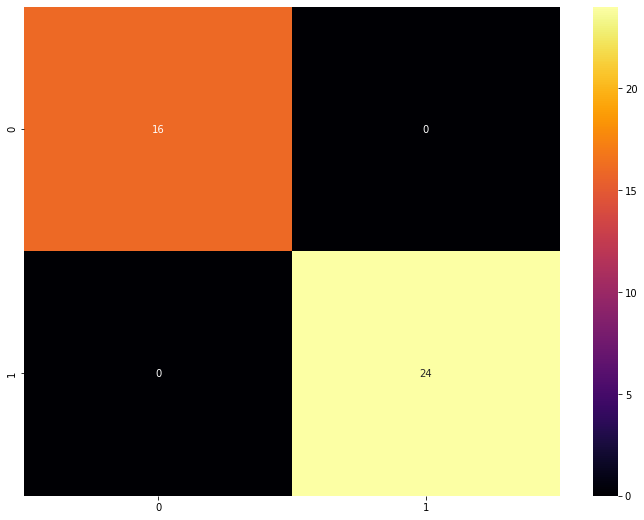

In [80]:
plt.figure(figsize = (12,9))
sns.heatmap(cm, annot = True, cmap = "inferno")
plt.show()

## SVM (Support Vector Machine)

In [81]:
from sklearn.svm import SVC

In [85]:
# Initializing object
svm_classifier = SVC(verbose=True)

In [86]:
# Fitting/Training the Model
svm_classifier.fit(x_train, y_train)

[LibSVM]

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=True)

In [88]:
svm_classifier.score(x_test, y_test) * 100

100.0

In [89]:
svm_y_predicion = svm_classifier.predict(x_test)

In [90]:
accuracy_score(svm_y_predicion, y_test)

1.0

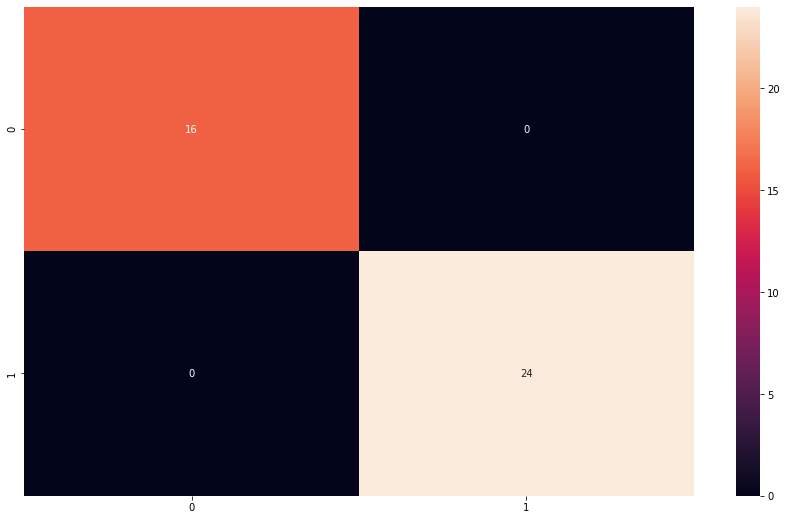

In [93]:
plt.figure(figsize = (15,9))
cm_svm = confusion_matrix(y_test, svm_y_predicion)
sns.heatmap(cm_svm, annot=True)
plt.show()

## Decision Tree
* Uses 3 factors to reach to a final decision:
  * Information_Gain
  * Entropy 
  * Gain

In [94]:
from sklearn.tree import DecisionTreeClassifier

In [95]:
dt_classifier = DecisionTreeClassifier()

In [96]:
dt_classifier.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [97]:
dt_classifier.score(x_test, y_test)

1.0

In [99]:
dt_y_prediction = dt_classifier.predict(x_test)

In [100]:
dt_y_prediction

array([1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1.,
       0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0.,
       1., 1., 0., 0., 1., 1.])

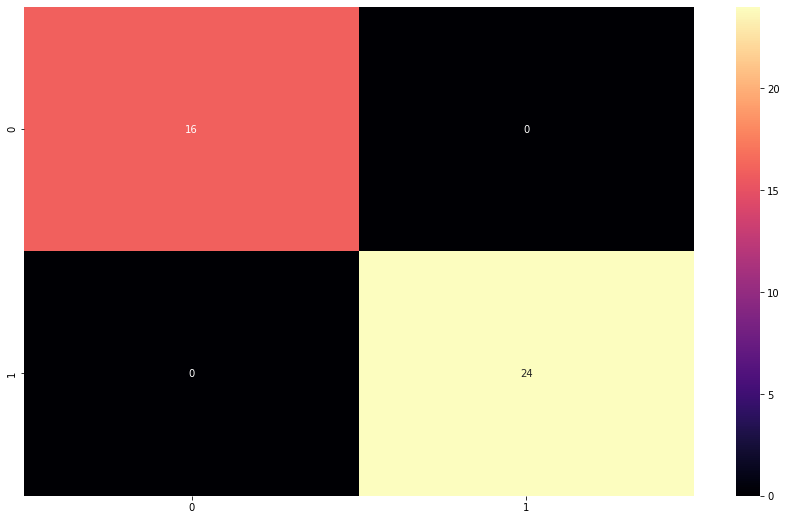

In [102]:
plt.figure(figsize=(15,9))
sns.heatmap(confusion_matrix(y_test, dt_y_prediction), annot = True, cmap = "magma")
plt.show()

In [ ]:
# Well done, You have completed a great journey till now and gained a lot more knowledge from others. Now, you are 